## Laboratorio práctico: manipulación de datos
Tiempo necesario estimado: 30 minutos

En este laboratorio, utilizará las habilidades adquiridas en el módulo y abordará los problemas de manejo de datos faltantes, corregirá el tipo de datos del atributo dataframe y ejecutará los procesos de estandarización y normalización de datos en atributos específicos del conjunto de datos.



### Objetivos
Después de completar este laboratorio, usted podrá:

Manejar datos faltantes de diferentes maneras


Corregir el tipo de datos de diferentes valores de datos según los requisitos


Estandarizar y normalizar los atributos de datos apropiados

Visualizar los datos como un gráfico de barras agrupado mediante Binning

Convertir datos categóricos en variables de indicadores numéricos


### Configuración
Para este laboratorio, utilizaremos las siguientes bibliotecas:

skillsnetwork para descargar el conjunto de datos

pandas para administrar los datos

numpy para operaciones matemáticas

matplotlib para herramientas de gráficos adicionales.

### Importación de las bibliotecas necesarias

Le recomendamos que importe todas las bibliotecas necesarias en un solo lugar (aquí):

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Descargue el conjunto de datos actualizado ejecutando la celda a continuación.

Las funciones a continuación descargarán el conjunto de datos en su navegador:

In [5]:
url = "https://raw.githubusercontent.com/BelenLMO/Python-Project-for-Data-Science/Practica-manupulacion-de-datos---Precio-ordenador/laptop_pricing_dataset_mod1.csv"

In [6]:
df = pd.read_csv(url)

Verifique la carga mostrando el resumen del marco de datos usando dataframe.info()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [7]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


Tenga en cuenta que podemos actualizar la columna Screen_Size_cm de modo que todos los valores se redondeen a los 2 decimales más cercanos utilizando numpy.round()

In [10]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


## Tarea 1
## Evaluar el conjunto de datos para detectar datos faltantes
Los datos faltantes se convirtieron por última vez de '?' a numpy.NaN. Pandas utiliza los valores NaN y Null de manera intercambiable. Esto significa que puede identificar las entradas que tienen valores Null. Escriba un código que identifique qué columnas tienen datos faltantes.

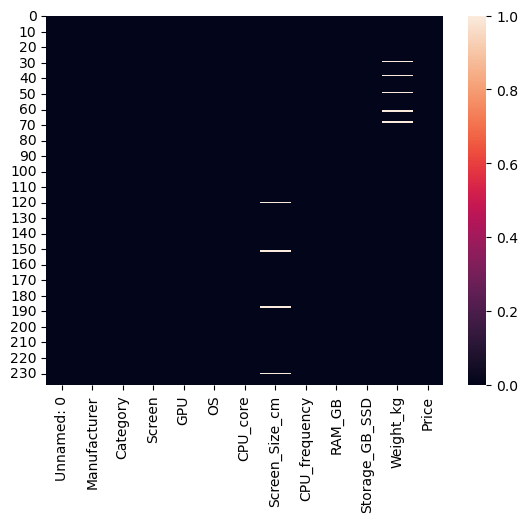

In [16]:
#"Devuelve True cuando el dato es NULL, Mostramos en color claro los Nulos 
df.isnull()
sns.heatmap(df.isnull())
plt.show()

In [17]:
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

   Unnamed: 0  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0       False         False     False   False  False  False     False   
1       False         False     False   False  False  False     False   
2       False         False     False   False  False  False     False   
3       False         False     False   False  False  False     False   
4       False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  
Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    23

In [18]:
# Verificar valores perdidos en el dataframe
valores_perdidos = df.isnull().sum()
print("Valores perdidos en cada columna:\n", valores_perdidos)

Valores perdidos en cada columna:
 Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64


### Reemplazar con media
Los valores faltantes en los atributos que tienen datos continuos se reemplazan mejor utilizando el valor medio. Observamos que los valores en el atributo "Peso_kg" son de naturaleza continua y faltan algunos valores. Por lo tanto, escriba un código para reemplazar los valores faltantes de peso con el valor promedio del atributo.

In [21]:
# replacing missing data with mean
avg_peso=df['Weight_kg'].astype('float').mean(axis=0)
df["Weight_kg"]=df["Weight_kg"].replace(np.nan, avg_peso)

### Reemplazar con el valor más frecuente
Los valores faltantes en los atributos que tienen datos categóricos se reemplazan mejor utilizando el valor más frecuente. Observamos que los valores en el atributo "Screen_Size_cm" son de naturaleza categórica y faltan algunos valores. Por lo tanto, escriba un código para reemplazar los valores faltantes de Screen Size con el valor más frecuente del atributo.

In [22]:
# replacing missing data with mode
tamaño = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"]=df["Screen_Size_cm"].replace(np.nan, tamaño)

Comprobamos que ya no tenemos los valores nulos:

In [23]:
valores_perdidos = df.isnull().sum()
print("Valores perdidos en cada columna:\n", valores_perdidos)

Valores perdidos en cada columna:
 Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64


## Tarea 3

### Estandarización de datos

El valor de Screen_size suele tener una unidad estándar de pulgadas. Utilice las unidades de conversión mencionadas a continuación y escriba un código para modificar las columnas del marco de datos en consecuencia. Actualice también su nombre.

1 pulgada = 2,54 cm


In [25]:
# Data standardization: convert screen size from cm to inch
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

### Normalización de datos

A menudo es necesario normalizar un atributo de datos continuo. Escriba un código para normalizar el atributo "CPU_frequency" con respecto al valor máximo disponible en el conjunto de datos.

In [26]:
df['CPU_frequency']=df['CPU_frequency']/df['CPU_frequency'].max()

## Tarea 4

### Binning

Binning es un proceso de creación de un atributo categórico que divide los valores de datos continuos en una cantidad específica de grupos. En este caso, escriba un código para crear 3 bins para el atributo "Precio". Estos bins se denominarían "Bajo", "Medio" y "Alto". El nuevo atributo se denominará "Price-binned".

In [28]:
bins= np.linspace(min(df['Price']),max(df['Price']),4)
group_names=['Low','Medium','High']
df['Price-binned']=pd.cut(df['Price'], bins, labels=group_names, include_lowest=True)

Además, trace el gráfico de barras de estos contenedores.

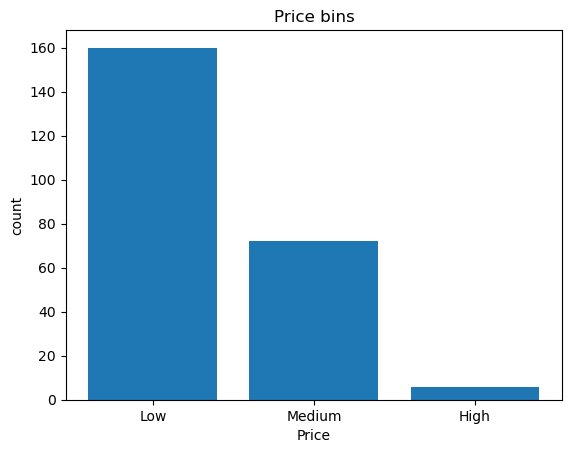

In [30]:
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")
plt.show()

### Tarea 5

Variables indicadoras

Convierta el atributo "Pantalla" del conjunto de datos en dos variables indicadoras: "Pantalla-IPS_panel" y "Pantalla-Full_HD". Luego, elimine el atributo "Pantalla" del conjunto de datos.

In [31]:
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)